# Parte Teórica

Classifique as afirmações em Verdadeiro ou Falso, justifique as afirmativas falsas

1 - Imagens negativas são frutos da operação "E" entre duas imagens

In [10]:
# F - Imagens negativas são geradas a partir da operção NOT com uma imagem 

2 - A conversão entre RGB e CMY é bem simples pois são espaços de cores complementares

In [11]:
# V

3 - O código abaixo representa um retângulo com o centro na posição 128,190, altura de 120 e largura de 64:
    
    "<rect x="128" y="190" width="64" height="120" fill="black"/>"

In [12]:
# F - X e Y representam a posição do lado superior esquerdo e não do centro do retângulo

4 - Imagens em grayscale possuem 3 páginas de cor porém todas estão em escala de cinza

In [13]:
# F - Imagens em greyscale possuem apenas uma página de cor

5 - Operações geométricas são aquelas que consistem na mudança espacial de pixels

In [14]:
# V

# Parte Prática

### Material de apoio

### Importações

```
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

### Manipulação de imagens

```
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')
(l,c,p) = img.shape
```

### Reflexão 


#### Alt1
```
mario_refl = np.zeros(shape=mario.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        mario_refl[new_y, new_x] = mario[i, j]
```

#### Alt2
```
mario_refl = np.zeros(shape=mario.shape, dtype=np.uint8)
mario_refl[::1, ::-1] = mario
```

### Greyscale

#### Algoritmo genérico, substituir o método escolhido
```
img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_np[i, j, 0])
        g = float(img_np[i, j, 1])
        b = float(img_np[i, j, 2])
        
        img_avg[i, j] = (aplicar método)
```

#### Métodos: 

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$

### Escalonamento com nearest neighbor

```
ls, cs = l * sy, c * sx
mario_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

for i in range(ls):
    for j in range(cs):
        new_y = int(np.floor(i * (l / ls)))
        new_x = int(np.floor(j * (c / cs)))
        
        mario_nn[i, j] = mario[new_y, new_x]
```

### Rotação com interpolação

```
alpha = np.pi / 6 # 30°

ls, cs = int(l * np.sqrt(2)), int(c * np.sqrt(2))
mario_rot = np.zeros((ls, cs, p), dtype=np.uint8)
for i in range(ls):
    for j in range(cs):
        cx = j - (ls / 2)
        cy = i - (cs / 2)
        
        new_x = int( cx * np.cos(alpha) + cy * np.sin(alpha) + l / 2)
        new_y = int(-cx * np.sin(alpha) + cy * np.cos(alpha) + c / 2)
        
        if 0 <= new_x < c and 0 <= new_y < l:
            mario_rot[i, j] = mario[new_y, new_x]
```

**1 -** Importe as bibliotecas que serão usadas

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**2 -** Abra as imagens mustache.jpg e shrek.png, retire o canal alpha se necessário, exiba essas imagens e mostre o formato de cada uma

(400, 400, 3)
(200, 200, 3)


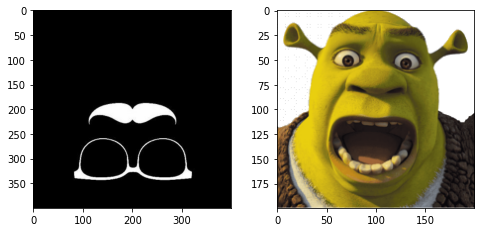

In [16]:
mustache = np.array(Image.open("mustache.jpg"))[:,:,:3]
shrek = np.array(Image.open("shrek.png"))[:,:,:3]

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(mustache)
plt.subplot(2,2,2)
plt.imshow(shrek)

print(mustache.shape)
print(shrek.shape)

**3 -** Crie uma função que realize a reflexão no eixo x, essa função deve receber uma **imagem como parâmetro** e **retornar uma imagem refletida no eixo x**. Aplique essa função na imagem "mustache" aberta na questão anterior e mostre o resultado.

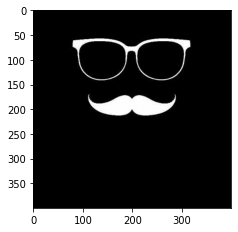

In [17]:
def reflex_x(img):
    (l,c,p) = img.shape
    img_reflex = np.zeros(shape=img.shape, dtype=np.uint8)
    
    for i in range(l):
        for j in range(c):
            new_y = -i #Espelha o valor de x
            new_x = -j #Espelha o valor de y
            img_reflex[new_y, new_x] = img[i, j]
            
    return img_reflex

mustache_reflex = reflex_x(mustache)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(mustache_reflex)

**4 -** Realize a operação lógica NOT com a imagem da questão anterior e mostre o resultado

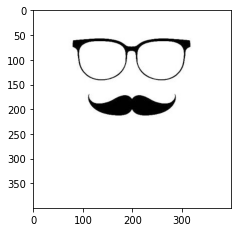

In [18]:
mustache_not = ~ mustache_reflex

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(mustache_not)

**5 -** Crie uma função que realize o escalonamento de uma imagem que receba como parâmetro uma **imagem, sx e sy**, sendo sx e sy os fatores de escalonamento e **retorne a imagem escalonada**, em seguida aplique o escalonamento na imagem "shrek" para que fique do mesmo tamanho da imagem da questão anterior. Exiba o resultado.

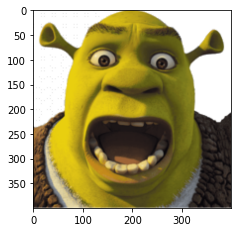

In [19]:

def amplify_img(img,sx,sy):
    (l, c ,p) = img.shape

    (ls, cs) = (l*sx,c*sy)

    sc_image = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

    #Aplica o nearest neighbor
    for i in range(ls):
        for j in range(cs):
            new_x= int(np.floor(i * (l / ls)))
            new_y = int(np.floor(j * (c / cs)))

            sc_image[i, j] = img[new_x, new_y]
            
    return sc_image

shrek_sc = amplify_img(shrek, 2, 2)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(shrek_sc)

**6 -** Realize o mascaramento (lógica E) entre as imagens das questões 4 e 5, exiba o resultado. 

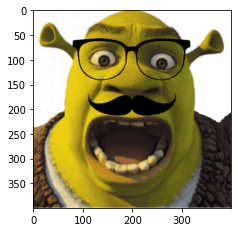

In [20]:
shrek_final = mustache_not & shrek_sc

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(shrek_final)

**7 -** Crie uma função para aplicar um método grayscale de sua escolha, que receba como parâmetro uma imagem e retorne uma imagem em greyscale. Aplique essa função na imagem resultante da questão anterior e mostre o resultado.

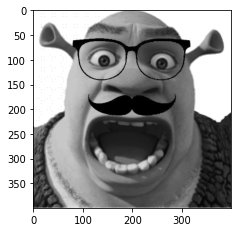

In [21]:
def grey_scale(img):
    res = (img[:,:,0] * 0.2126 + 
          img[:,:,1] * 0.7152 + 
          img[:,:,2] * 0.0722).astype(np.uint8)
    
    return res

res_grey = grey_scale(shrek_final)
    
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(res_grey, cmap="gray")

**8 -** Crie uma função que realize uma rotação com interpolação, a função deve receber como parâmetro **uma imagem e o ângulo alpha com que deve ser rotacionada** e **retornar uma imagem rotacionada com o angulo alpha**. Modifique o algoritmo de rotação para que funcione se necessário. Aplique a função na imagem resultante da questão anterior com **ângulo de 60°** e mostre o resultado.

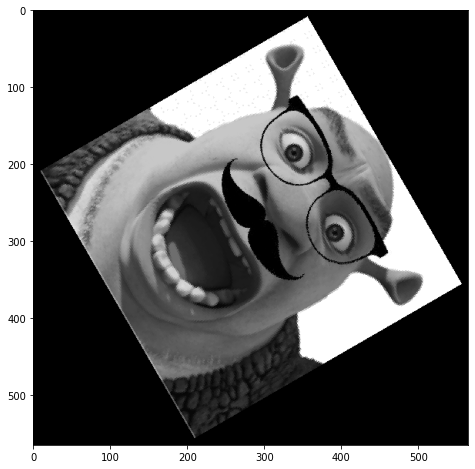

In [22]:
def rotation(img,alpha):
    (l , c) = img.shape
    ls, cs = int(l * np.sqrt(2)), int(c * np.sqrt(2))
    img_rot = np.zeros((ls, cs), dtype=np.uint8)
    
    for i in range(ls):
        for j in range(cs):
            cx = j - (ls / 2)
            cy = i - (cs / 2)
        
            new_x = int( cx * np.cos(alpha) + cy * np.sin(alpha) + l / 2)
            new_y = int(-cx * np.sin(alpha) + cy * np.cos(alpha) + c / 2)
        
            if 0 <= new_x < c and 0 <= new_y < l:
                img_rot[i, j] = img[new_y, new_x]
    
    return img_rot

alpha = np.pi / 3 # 60°

res_rotate = rotation(res_grey,alpha)
plt.figure(figsize=(8, 8))
plt.imshow(res_rotate, cmap="gray")

**9 -** Salve a imagem da questão anterior no disco com o nome "resultado.jpg"

In [23]:
Image.fromarray(res_rotate).save("resultado.jpg")